<a href="https://colab.research.google.com/github/sm7402/Diabetes-Prediction/blob/main/ML_Based_Stroke_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
df=pd.read_csv("Data/heart_disease_data.csv")

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df['target'].value_counts()

In [ ]:
X=df.drop(columns='target',axis=1)
X

In [ ]:
Y=df['target']
Y

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=25)

In [ ]:
X.shape

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
Y_train.shape

In [ ]:
Y_test.shape

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
X_train_prediction=model.predict(X_train)
training_accuracy = accuracy_score(X_train_prediction,Y_train)
print(f"The training accuracy is {training_accuracy}")


The training accuracy is 0.8388429752066116


In [ ]:
X_test_prediction=model.predict(X_test)
testing_accuracy = accuracy_score(X_test_prediction,Y_test)
print(f"The testing accuracy is {testing_accuracy}")

The testing accuracy is 0.8360655737704918


In [ ]:
input_data=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)
input_data=np.asarray(input_data)
input_data=input_data.reshape(1,-1)
prediction=model.predict(input_data)
prediction
if prediction[0]==0:
  print("Good News the patient doesn't have any heart disease")
else:
  print("The patient should go to hospital")

The patient should go to hospital


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


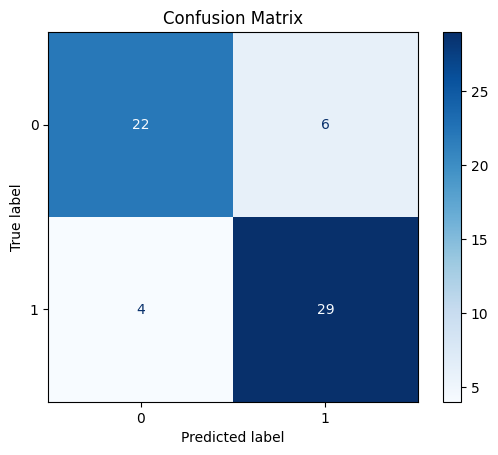

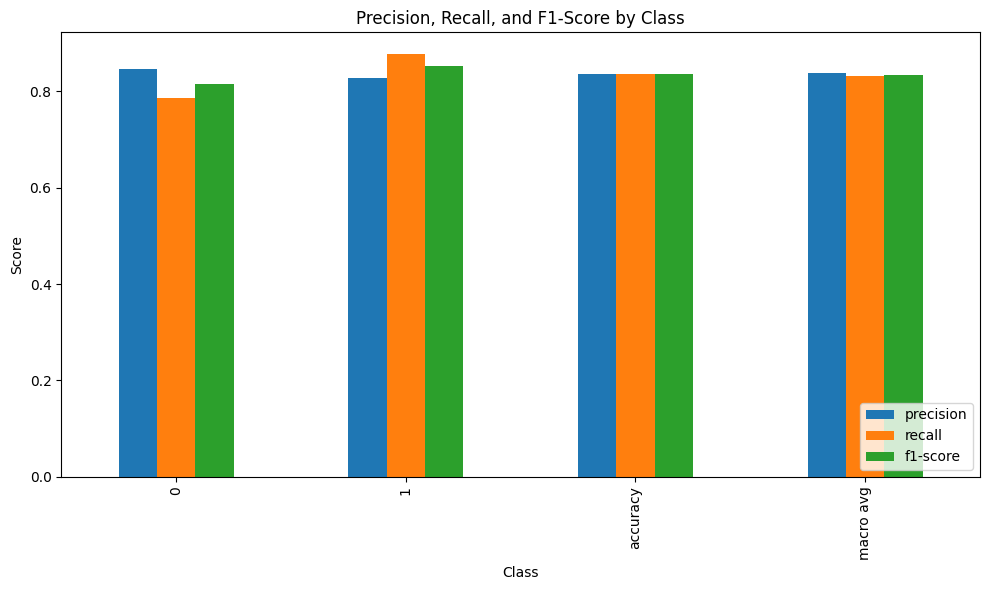

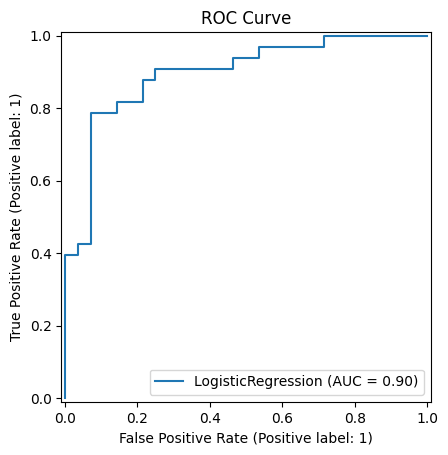

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
import pandas as pd

# Generate a confusion matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")  # Save the plot as an image
plt.show()

# Generate a classification report
class_report = classification_report(Y_test, X_test_prediction, output_dict=True)

# Convert classification report to a DataFrame for plotting
metrics_df = pd.DataFrame(class_report).transpose()
metrics_df = metrics_df.iloc[:-1, :].drop(columns=['support'])  # Remove 'support' and 'accuracy' rows

# Plot precision, recall, and F1-score for each class
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, and F1-Score by Class")
plt.xlabel("Class")
plt.ylabel("Score")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("metrics_bar_chart.png")  # Save the plot as an image
plt.show()

# Plot ROC Curve
RocCurveDisplay.from_estimator(model, X_test, Y_test)
plt.title("ROC Curve")
plt.savefig("roc_curve.png")  # Save the plot as an image
plt.show()


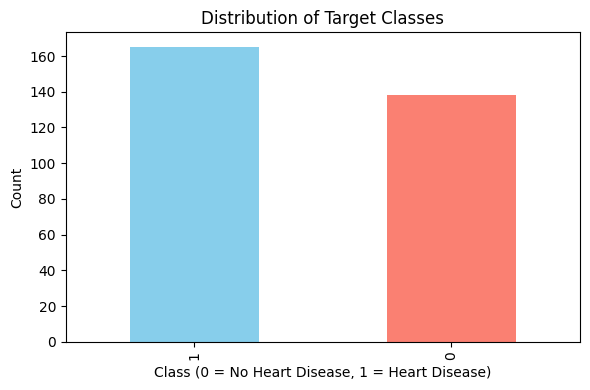

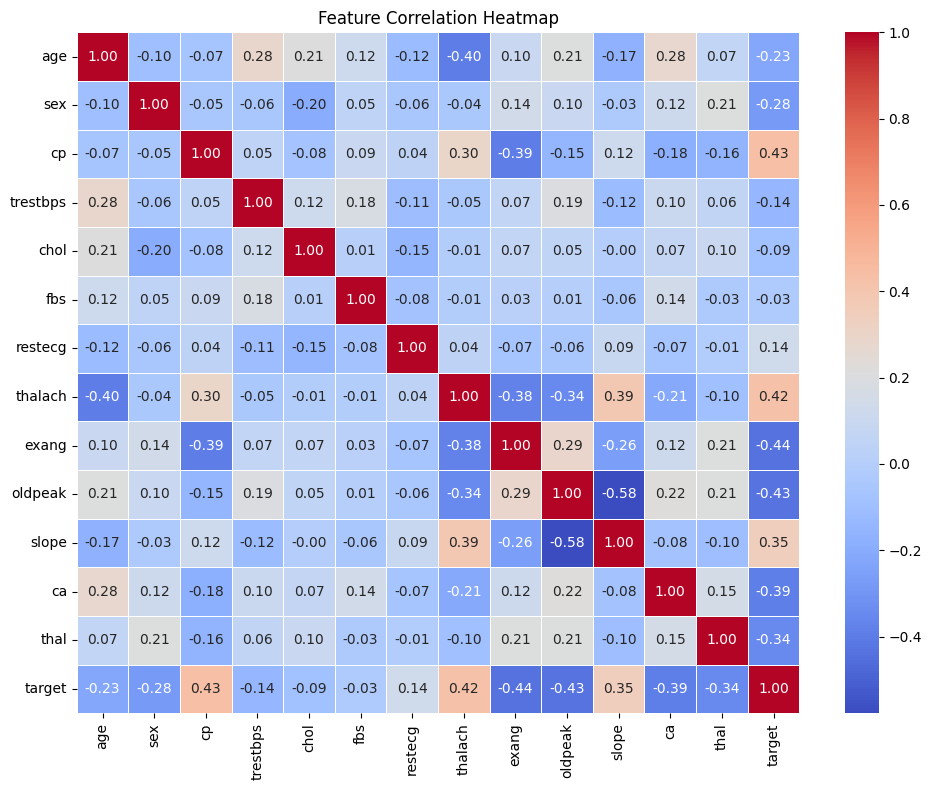

<Figure size 1000x400 with 0 Axes>

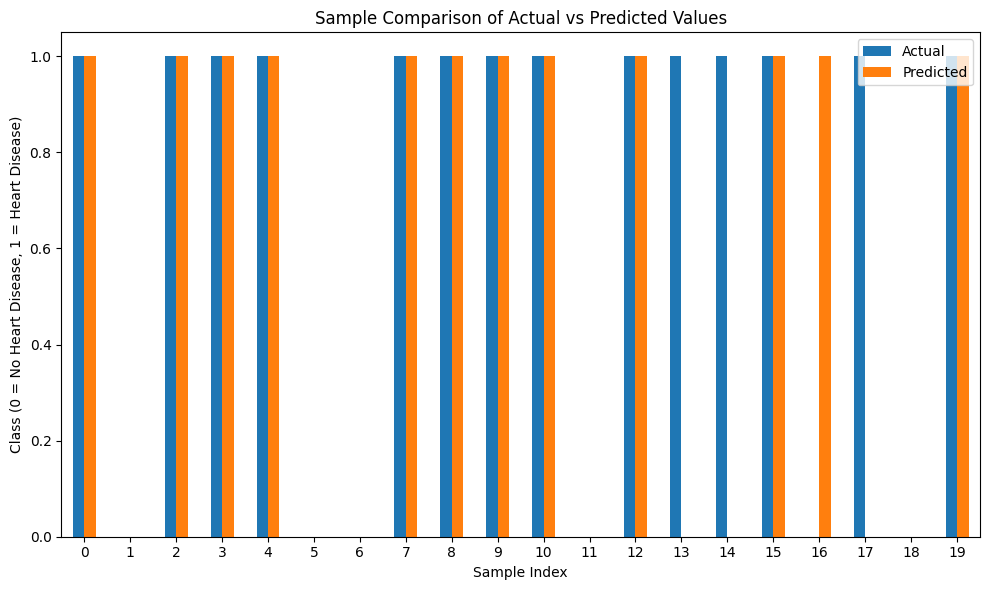

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Distribution of Target Classes
plt.figure(figsize=(6, 4))
Y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Target Classes")
plt.xlabel("Class (0 = No Heart Disease, 1 = Heart Disease)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("target_distribution.png")  # Save the plot as an image
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")  # Save the plot as an image
plt.show()

# 3. Comparison of Predicted vs Actual Values
comparison_df = pd.DataFrame({'Actual': Y_test.values, 'Predicted': X_test_prediction})
comparison_sample = comparison_df.sample(20, random_state=42).reset_index(drop=True)  # Sample 20 for simplicity

plt.figure(figsize=(10, 4))
comparison_sample.plot(kind='bar', figsize=(10, 6))
plt.title("Sample Comparison of Actual vs Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Class (0 = No Heart Disease, 1 = Heart Disease)")
plt.xticks(rotation=0)
plt.legend(["Actual", "Predicted"])
plt.tight_layout()
plt.savefig("actual_vs_predicted.png")  # Save the plot as an image
plt.show()
